In [1]:
import pandas as pd
import numpy as np
from GA_portfolio import Portfolio_Selection
import matplotlib.pyplot as plt

data = pd.read_excel('指数数据1.xlsx',sheet_name='对数收益率')
data.index=data['日期']
del data['日期']

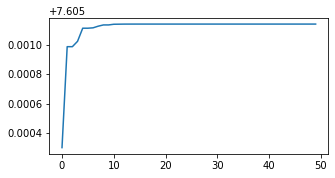

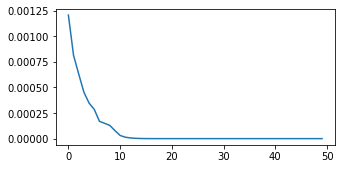

In [6]:
# 计算最大迭代次数
ps=Portfolio_Selection(data.values,s=1,period=2,money=2000,random_state=7)
res=ps.cal_best_iter()


plt.figure(figsize=(5,2.5))
plt.figure(1)
plt.plot(res[0])
plt.figure(figsize=(5,2.5))
plt.figure(2)
plt.plot(res[1])

##### 单期遗传算法

In [ ]:
ps=Portfolio_Selection(data.values,s=1,period=2,money=2000,random_state=0)
ps.fit()
ps.get_sharpe()

##### 多期遗传算法

In [ ]:
ps=Portfolio_Selection(data.values,s=5,period=2,money=2000,random_state=1)
ps.fit()
ps.get_sharpe()

In [ ]:
# 净值图
plt.figure(figsize=(20,5))
plt.plot(ps.moneys)

In [ ]:
# 持仓图
weights_series=list(np.array(ps.get_weights()).transpose(1,0))
plt.figure(figsize=(20,5))
for i in range(7):
    plt.plot(weights_series[i])

##### 数据描述性统计

In [ ]:
data.corr()

In [ ]:
data.describe()